In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# read into the data

df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,6-13-1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,7-2-1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6-20-1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7-2-1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7-25-1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# check for missing values

for col in df.columns:
  percent_missing = np.mean(df[col].isnull())
  print(f'{col} - {percent_missing} %')

name - 0.0 %
rating - 0.010041731872717789 %
genre - 0.0 %
year - 0.0 %
released - 0.0002608242044861763 %
score - 0.0003912363067292645 %
votes - 0.0003912363067292645 %
director - 0.0 %
writer - 0.0003912363067292645 %
star - 0.00013041210224308815 %
country - 0.0003912363067292645 %
budget - 0.2831246739697444 %
gross - 0.02464788732394366 %
company - 0.002217005738132499 %
runtime - 0.0005216484089723526 %


In [25]:
# replace Na values with 0

df = df.fillna(0)

In [28]:
for col in df.columns:
  percent_missing = np.mean(df[col].isnull())
  print(f'{col} - {percent_missing} %')

name - 0.0 %
rating - 0.0 %
genre - 0.0 %
year - 0.0 %
released - 0.0 %
score - 0.0 %
votes - 0.0 %
director - 0.0 %
writer - 0.0 %
star - 0.0 %
country - 0.0 %
budget - 0.0 %
gross - 0.0 %
company - 0.0 %
runtime - 0.0 %
correctyear - 0.0 %


In [5]:
# data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# change the data type for 'budget' and 'gross' to integer

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,6-13-1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,7-2-1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6-20-1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7-2-1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7-25-1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
# create a column with the correct year, because columns 'released' and 'year' don't match.

df['correctyear'] = df['released'].astype(str).str[-4:]

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,6-13-1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,7-2-1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6-20-1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,7-2-1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,7-25-1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [10]:
# add vertical scrollbar
pd.set_option('display.max_rows', None)

In [11]:
# order by the gross revenue

df = df.sort_values(by = ['gross'], inplace=False, ascending=False )

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,12-18-2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,4-26-2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,12-19-1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,12-18-2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,4-27-2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [ ]:
# drop any duplicates

df.drop_duplicates()

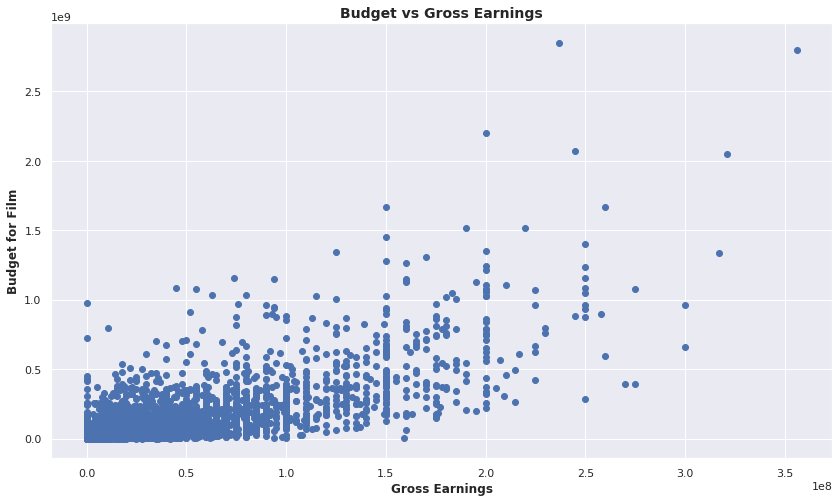

In [14]:
# create scatter plot with budget vs gross revenue

plt.figure(figsize=(14,8))
plt.scatter(x=df['budget'],
            y=df['gross'])
plt.title('Budget vs Gross Earnings', fontsize=14, fontweight='bold')
plt.xlabel('Gross Earnings', fontsize=12, fontweight='bold')
plt.ylabel('Budget for Film', fontsize=12, fontweight='bold')
plt.show()

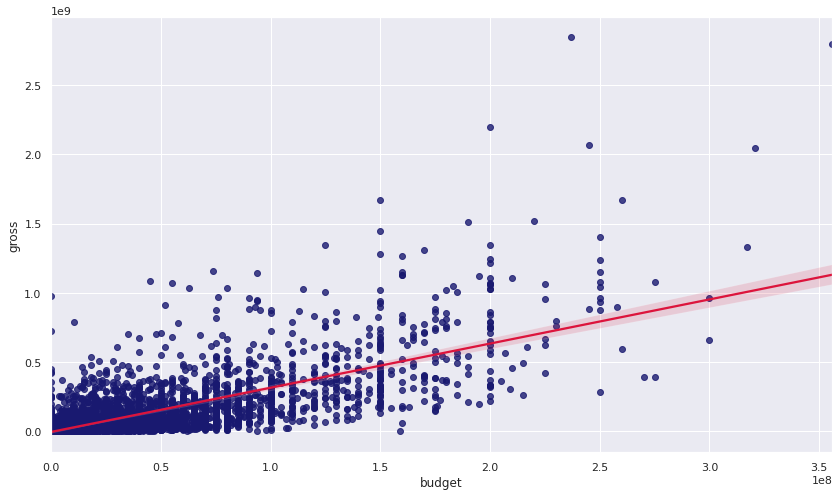

In [15]:
# plot budget vs gross using seaborn
plt.figure(figsize=(14,8))
sns.regplot(x=df['budget'],
            y=df['gross'],
            data=df,
            scatter_kws = {'color': 'midnightblue'},
            line_kws={'color':'crimson'})
plt.show()

In [16]:
# look at correlation (work just with numerical fields)

df.corr(method = 'pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


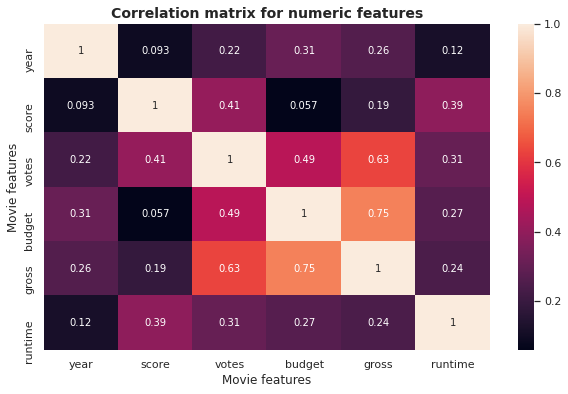

In [17]:
# create a visualization of the correlation matrix
# brighter color = hight correlation

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features', fontsize=14, fontweight ='bold')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [18]:
# transform the rest of columns into numerical

df_numerized = df

for col_name in df_numerized.columns:
  if df_numerized[col_name].dtype == 'object':
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes      # give the random numerization

df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,533,6,0,2009,801,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,31
7445,535,6,0,2019,1555,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,41
3045,6896,6,6,1997,807,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,19
6663,5144,6,0,2015,803,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,37
7244,536,6,0,2018,1563,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,40


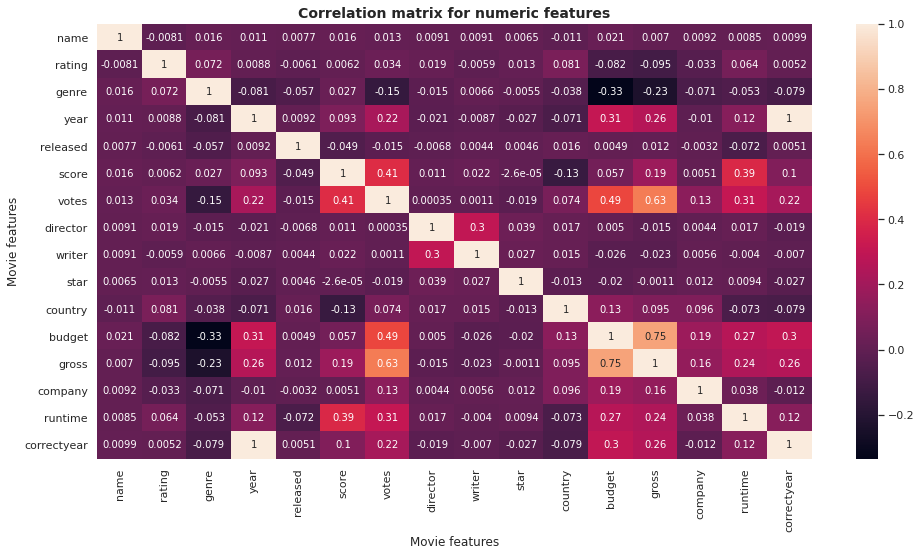

In [19]:
correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features', fontsize=14, fontweight ='bold')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()


In [23]:
# organize to see quickly who have highest correlation 

correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released       0.007740
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             correctyear    0.009936
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released      -0.006084
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [24]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
score        country       -0.133346
country      score         -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
rating       budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
genre        correctyear   -0.079287
correctyear  genre         -0.079287
country      correctyear   -0.078631
correctyear  country       -0.078631
country      runtime       -0.073319
runtime      country       -0.073319
             released      -0.072085
released     runtime       -0.072085
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
released     genre         -0.057356
g

In [22]:
hight_corr = sorted_pairs[(sorted_pairs) > 0.5]

hight_corr

votes        gross          0.632870
gross        votes          0.632870
             budget         0.750157
budget       gross          0.750157
correctyear  year           0.995240
year         correctyear    0.995240
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings